In [ ]:
! pip install kaggle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d rahat52/traffic-density-singapore

100% 222M/222M [00:02<00:00, 139MB/s]
100% 222M/222M [00:02<00:00, 107MB/s]


In [9]:
from zipfile import ZipFile
dataset = '/content/traffic-density-singapore.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import re
import random
import glob
import cv2

In [11]:
dataset_path = '/content/Final Dataset/training/Empty'

In [12]:
!cd "/content/Final Dataset/training" && ls

 Empty	 High   Low   Medium  'Traffic Jam'


In [13]:
# Get the list of image files in the dataset directory
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

In [14]:
# Calculate the total number of images in the dataset
num_images = len(image_files)
print("Total number of images:", num_images)

Total number of images: 1186


## Visualising the images
## Empty Roads

In [15]:
# Display a few sample images of empty roads
dir_path = "/content/Final Dataset/training/Empty"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:5]

['/content/Final Dataset/training/Empty/8140b5b4-b108-4f22-947d-3a05587a1dc0.jpg',
 '/content/Final Dataset/training/Empty/bd188cf3-0574-49cc-9b57-b7aa7077ac48.jpg',
 '/content/Final Dataset/training/Empty/56711c2c-3cb3-46a2-b1f0-704f1fcd1eae.jpg',
 '/content/Final Dataset/training/Empty/879ccc7c-3301-425d-b803-0e8d0a5cc9b9.jpg',
 '/content/Final Dataset/training/Empty/34f869d5-cd22-4270-a822-4ae3b7484f65.jpg']

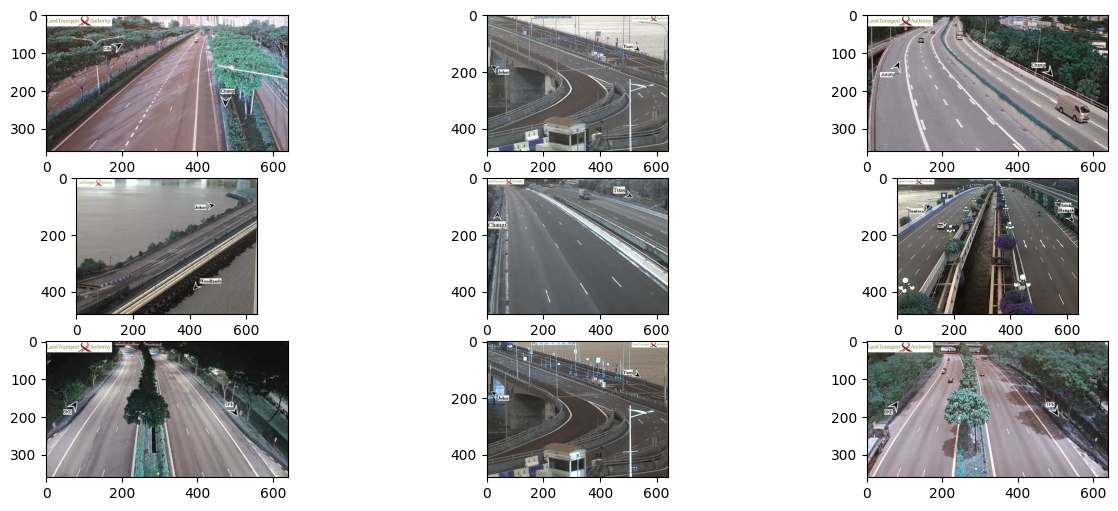

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the imgaes
## Low Traffic Roads

In [17]:
# getting some visualisation of the Low traffic
dir_path = "/content/Final Dataset/training/Low"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:5]

['/content/Final Dataset/training/Low/d188c6b2-f493-4664-b667-9e9373906ed1.jpg',
 '/content/Final Dataset/training/Low/722556f3-6fe9-49d1-ac8a-0f81c4623691.jpg',
 '/content/Final Dataset/training/Low/0aacb3ce-c2a1-4420-a756-e48b6be81b89.jpg',
 '/content/Final Dataset/training/Low/9313244a-368d-4653-837b-b327a45f4eff.jpg',
 '/content/Final Dataset/training/Low/ef969416-9652-4867-a0f1-8c75b09e887f.jpg']

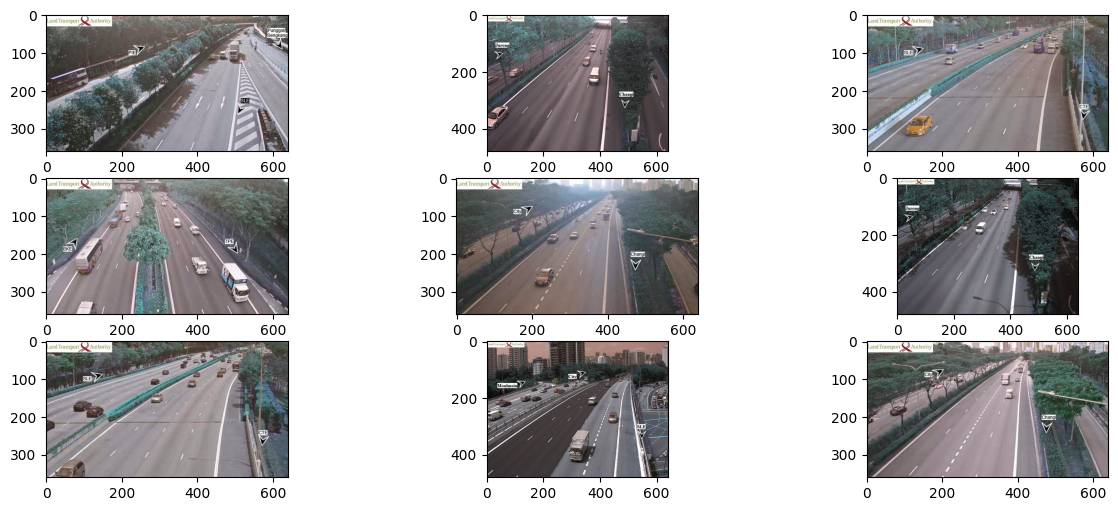

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the images with High traffic

In [19]:
# with High traffic images data
dir_path = "/content/Final Dataset/training/High"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:5]

['/content/Final Dataset/training/High/a3a14936-7899-43f6-bfaf-065ff23399b5 (1).jpg',
 '/content/Final Dataset/training/High/b9a63843-3314-4489-bfa5-897524473ce2.jpg',
 '/content/Final Dataset/training/High/b06e6a4e-06e7-4f42-9bed-c3b661e2613a.jpg',
 '/content/Final Dataset/training/High/b0de66d8-ff58-4557-baaf-e3344aaaa3ca.jpg',
 '/content/Final Dataset/training/High/382b6ae5-2eaa-4f3e-b1d4-77e497353bcc.jpg']

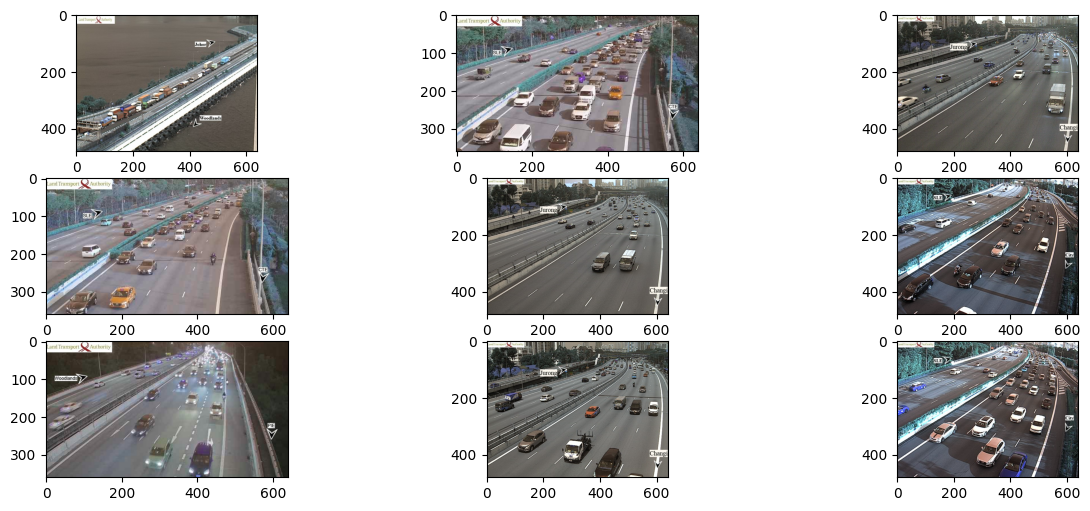

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the Traffic Jam data

In [21]:
dir_path = "/content/Final Dataset/training/Traffic Jam"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:5]

['/content/Final Dataset/training/Traffic Jam/b398ac57-4936-40f3-93de-7e06ac34de56.jpg',
 '/content/Final Dataset/training/Traffic Jam/327fec07-0b82-4354-b6f5-3349ef8932b5.jpg',
 '/content/Final Dataset/training/Traffic Jam/images53.jpg',
 '/content/Final Dataset/training/Traffic Jam/a87c8fcc-87ce-42af-8de7-72fc97a9f407.jpg',
 '/content/Final Dataset/training/Traffic Jam/images16.jpg']

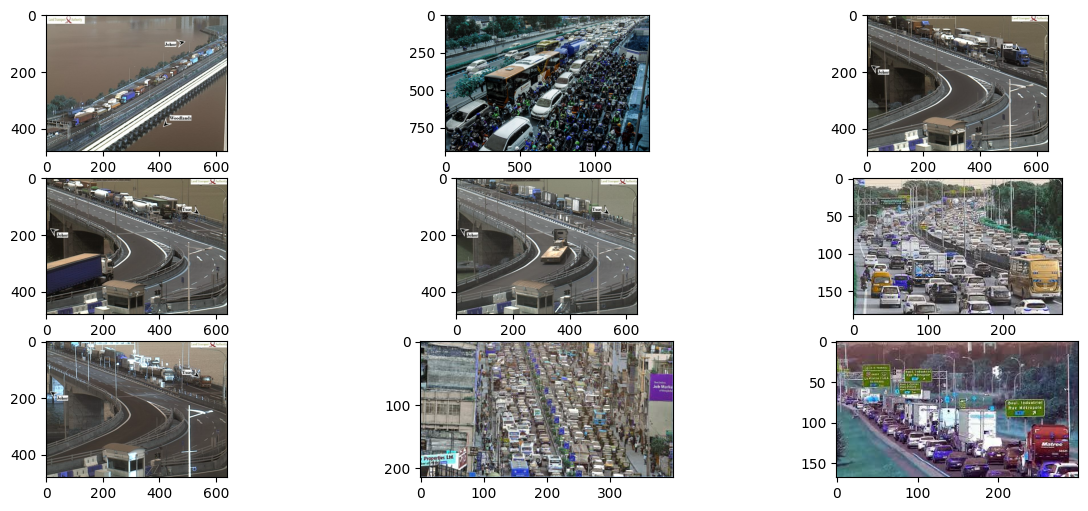

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

# Imgage processing on High and Traffic Jam data images

In [23]:
# Set the directory path to your image data
dir_path = "/content/Final Dataset/training/Traffic Jam"

In [24]:
# Get the list of image files in the directory
images = os.listdir(dir_path)

In [25]:
# Select a subset of images for visualization
num_samples = 9
random_images = random.sample(images, num_samples)

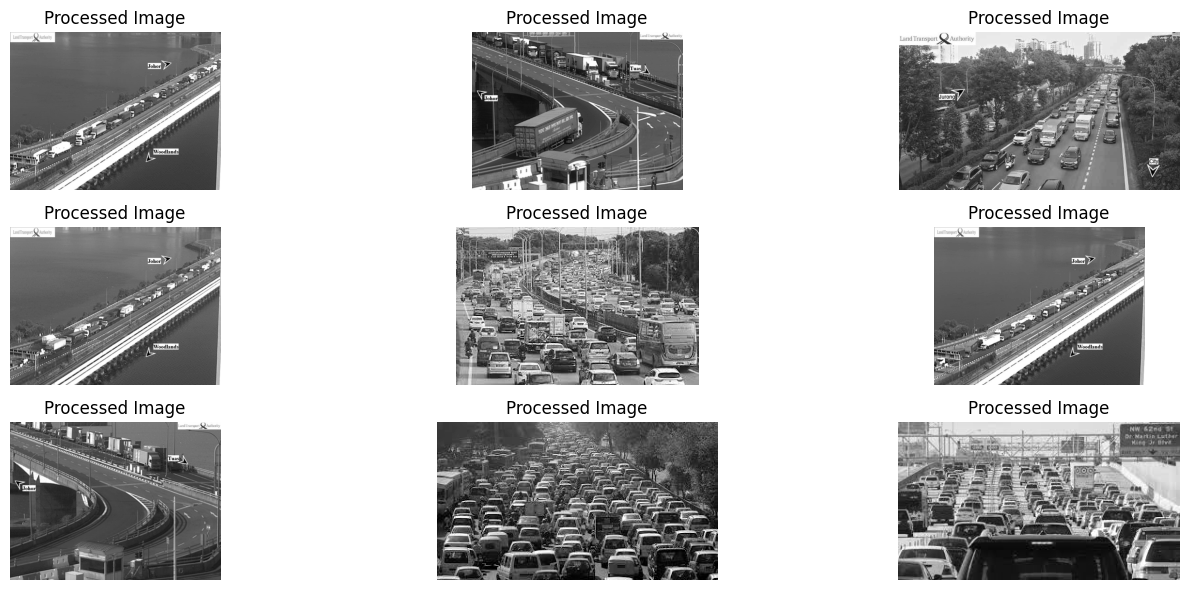

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 6))
for i, a in enumerate(ax.flatten()):
    img_path = os.path.join(dir_path, random_images[i])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply image processing steps (example: convert to grayscale)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    a.imshow(gray, cmap='gray')
    a.set_title("Processed Image")
    a.axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Set the directory path to your image data
dir_path = "/content/Final Dataset/training/High"

In [28]:
# Get the list of image files in the directory
images = os.listdir(dir_path)

In [29]:
# Select a subset of images for visualization
num_samples = 9
random_images = random.sample(images, num_samples)

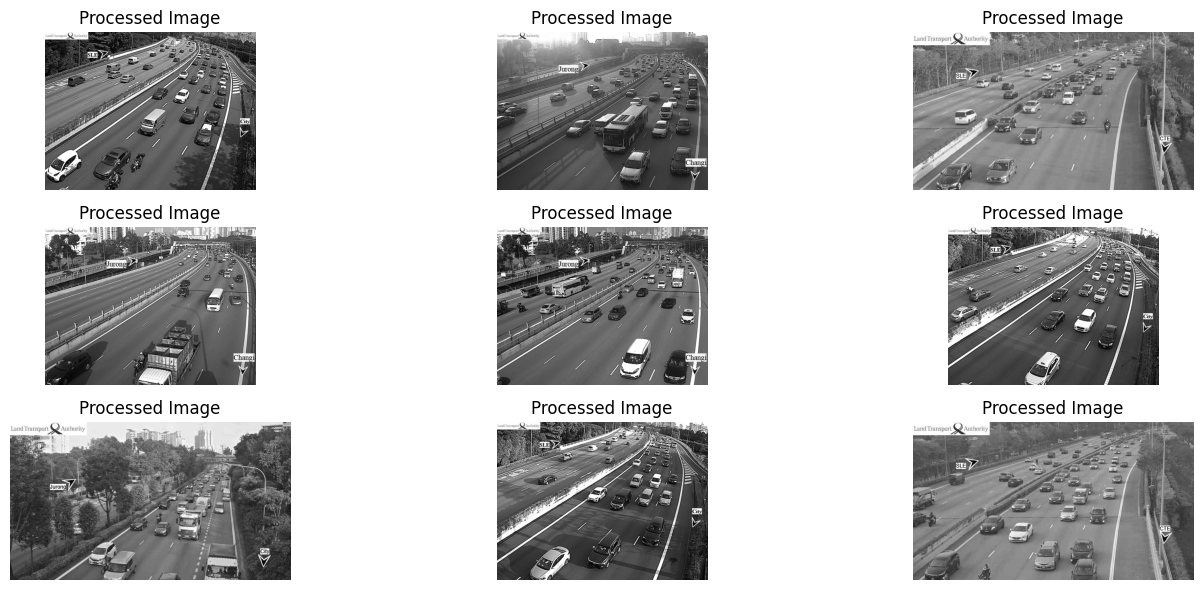

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 6))
for i, a in enumerate(ax.flatten()):
    img_path = os.path.join(dir_path, random_images[i])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply image processing steps (example: convert to grayscale)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    a.imshow(gray, cmap='gray')
    a.set_title("Processed Image")
    a.axis('off')

plt.tight_layout()
plt.show()

# Preprocessing

In [55]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

In [57]:
# Directory containing your traffic congestion images
image_dir = '/content/Final Dataset/training/Traffic Jam'

In [58]:
# List to store preprocessed images
preprocessed_images = []
labels = []

In [59]:
# Load and preprocess images
for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    image = load_img(image_path, target_size=(224, 224))  # Resize image to desired dimensions
    image = img_to_array(image)  # Convert image to NumPy array
    image = image.astype(np.float32) / 255.0  # Normalize pixel values between 0 and 1
    preprocessed_images.append(image)
    label = 1 if 'congested' in filename else 0  # Assuming image filenames indicate congestion or not
    labels.append(label)

In [60]:
# Convert preprocessed images and labels to NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)


In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, labels, test_size=0.2, random_state=42)

In [62]:
# Print the shape of the preprocessed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (152, 224, 224, 3)
X_test shape: (38, 224, 224, 3)
y_train shape: (152,)
y_test shape: (38,)


# Model Training

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [64]:
# create a sequential model

model = Sequential()

In [65]:
# Add Convolutional layers

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [66]:
# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 24s 5s/step - loss: 0.1547 - accuracy: 0.7895 - val_loss: 4.4748e-14 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 28s 5s/step - loss: 6.1047e-12 - accuracy: 1.0000 - val_loss: 8.9539e-26 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 21s 4s/step - loss: 9.9558e-24 - accuracy: 1.0000 - val_loss: 3.2732e-35 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 4.3878e-30 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 19s 4s/step - loss: 4.6862e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 22s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 19s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val

In [103]:
# Save the trained model
model.save('path/to/save/model.h5')

In [104]:
# Define the class labels
class_labels = ['Empty', 'High', 'Low', 'Medium', 'Traffic Jam']

In [105]:
# Load the saved trained model
model = tf.keras.models.load_model('/content/path/to/save/model.h5')

In [122]:
# Load and preprocess the new testing/validation data
test_image_path = '/content/Final Dataset/testing/Empty/02bbbe52-297c-4eed-aac2-de40ad6bd0b8.jpg'  # Path to the new testing/validation image
image = load_img(test_image_path, target_size=(224, 224))
image = img_to_array(image)
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)  # Add an extra dimension for batch size

In [123]:

# Perform prediction
predictions = model.predict(image)


1/1 [==============================] - 0s 133ms/step


In [124]:
# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

In [125]:
# Print the predicted class label
print("Predicted Class Label:", predicted_class_label)


Predicted Class Label: Empty
